# Post Analysis with SCAT files

After saving and SCAT file, we often want to do post analysis on the spectral data.
For example, calculating fluxes and light curves from the fitted models.

A set of tools in included that allow you to do a few of these things.

In [1]:
%pylab inline

# The SCAT reader class will read in an SCAT file
# and process it so that you can easily access the 
# fitted parameters. Additionally, there are hooks 
# from other programs that read these files.

from spectralTools.scatReader import scatReader

# Often we need to compute the energy/photon fluxes 
# from our spectral fits. The following utility allows
# you to do this with a few bonuses. When doing multi-component
# spectral fitting, it is important to properly propoagte your
# errors when computing the fluxes. This code will handle that 
# for you.

from spectralTools.temporal.fluxLightCurve import fluxLightCurve


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Create and SCAT object
s=scatReader("batchFit.fit")

In [3]:
# If you made multiple fits by hand,
# scatReader objects add
# s = s1 + s2

# Printing the scatReader object tells
# you the models loaded and the time
# bins that are included
print s

SCAT Models:
Band's GRB, Epeak


Time Bins:
0.0 : 5.0
5.0 : 10.0
10.0 : 15.0
15.0 : 20.0
20.0 : 25.0
25.0 : 30.0
30.0 : 35.0
35.0 : 40.0
40.0 : 45.0
45.0 : 50.0
50.0 : 55.0
55.0 : 60.0
60.0 : 65.0
65.0 : 70.0





Let's look at the Ep evolution from the Band fits

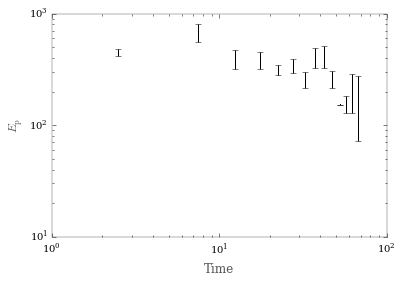

In [4]:
# The GetParamArray(model,param) member 
# returns an array of the values and the 
# errors. The 0th column is the values
# and the final two are the symmetric or
# asymmetric errors

Ep = s.GetParamArray("Band's GRB, Epeak","Epeak")[:,0]
EpErr = s.GetParamArray("Band's GRB, Epeak","Epeak")[:,1]

# Get the mean of the time bins for plotting

time = s.meanTbins

# And plot

errorbar(time,Ep,yerr=EpErr,fmt=',',color='k')
ylabel(r"$E_{\rm p}$")
xlabel("Time")
xscale('log')
yscale('log')

We can do the same for otehr parameters or models

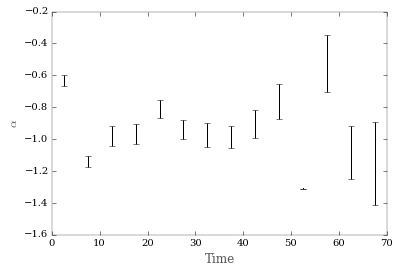

In [5]:
alpha = s.GetParamArray("Band's GRB, Epeak","alpha")[:,0]
alphaErr = s.GetParamArray("Band's GRB, Epeak","alpha")[:,1]

# Get the mean of the time bins for plotting

time = s.meanTbins

# And plot

errorbar(time,alpha,yerr=alphaErr,fmt=',',color='k')
ylabel(r"$\alpha$")
xlabel("Time")


These arrays can now be used to fit relations.

As an example, let's look at the hardness-intensity correlation (Golenetskii 1986)

We will need to calculate the energy flux for the Band function from the fits.

## Creating a flux light curve

In [6]:
# Feed in he scat object and select an energy range\
# Optionally you can  input a redshift to perform
# k-corrections

flc = fluxLightCurve(s, 8., 40000.)

In [7]:
# Calcualte the fluxes and
# The errors
flc.CreateEnergyLightCurve()
flc.EnergyLightCurveErrors()
flc.SaveEnergy() # Save out these possibly lengthy calculations

/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 7.065317e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 2.481586e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 2.703928e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 1.239952e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 4.125791e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 3.243201e-03
  AccuracyWarning

Completed 1 of 14 fluxes


Completed 2 of 14 fluxes


Completed 3 of 14 fluxes


Completed 4 of 14 fluxes


Completed 5 of 14 fluxes


Completed 6 of 14 fluxes


Completed 7 of 14 fluxes


Completed 8 of 14 fluxes


Completed 9 of 14 fluxes


Completed 10 of 14 fluxes


Completed 11 of 14 fluxes


Completed 12 of 14 fluxes



/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 1.309435e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 3.798081e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 2.543827e-05
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 2.065273e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 6.575358e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 2.288845e-04
  AccuracyWarning


Completed 13 of 14 fluxes


Completed 14 of 14 fluxes




/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 6.636039e-04
  AccuracyWarning)


In [8]:
bandEflux    = flc.energyFluxes["Band's GRB, Epeak"]
bandEfluxErr = flc.energyFluxErrors["Band's GRB, Epeak"]

Now we can look at the HIC

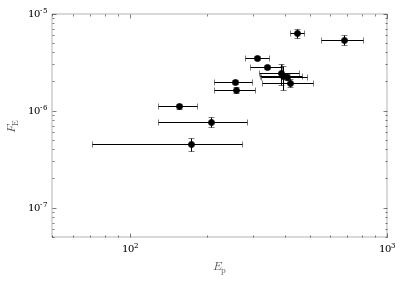

In [9]:
errorbar(Ep,bandEflux,xerr=EpErr,yerr=bandEfluxErr,fmt='o',color='k')
xscale('log')
yscale('log')
ylim(bottom = 5E-8)
xlim(left = 50)
xlabel(r"$E_{\rm p}$")
ylabel(r"$F_{\rm E}$")

## Multi component analysis

Now we want to look at the light curves of two components in a spectrum

In [10]:
s2 = scatReader("batchFit_BB.fit")

In [11]:
print s2

SCAT Models:
Band's GRB, Epeak
Black Body


Time Bins:
0.0 : 5.0
5.0 : 10.0
10.0 : 15.0
15.0 : 20.0
20.0 : 25.0
25.0 : 30.0
30.0 : 35.0
35.0 : 40.0
40.0 : 45.0
45.0 : 50.0
50.0 : 55.0
55.0 : 60.0
60.0 : 65.0
65.0 : 70.0





In [29]:
flc2 = fluxLightCurve(s2, 8., 40000.)
flc2.CreateEnergyLightCurve()
flc2.EnergyLightCurveErrors()
flc2.SaveEnergy() # Save out these possibly lengthy calculations

/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 4.182498e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 8.080775e-04
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 6.417886e-05
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 3.126330e-04
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 1.199619e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 2.299797e-03
  AccuracyWarning

Completed 1 of 14 fluxes


Completed 2 of 14 fluxes


Completed 3 of 14 fluxes


Completed 4 of 14 fluxes


Completed 5 of 14 fluxes


Completed 6 of 14 fluxes


Completed 7 of 14 fluxes


Completed 8 of 14 fluxes


Completed 9 of 14 fluxes


Completed 10 of 14 fluxes


Completed 11 of 14 fluxes



/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 2.516339e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 2.884052e-05
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 5.341812e-05
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 2.346899e-05
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 3.237692e-06
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 2.046663e-03
  AccuracyWarning


Completed 12 of 14 fluxes


Completed 13 of 14 fluxes


Completed 14 of 14 fluxes


Completed 15 of 14 fluxes


Completed 16 of 14 fluxes


Completed 17 of 14 fluxes


Completed 18 of 14 fluxes


Completed 19 of 14 fluxes


Completed 20 of 14 fluxes


Completed 21 of 14 fluxes


Completed 22 of 14 fluxes


Completed 23 of 14 fluxes


Completed 24 of 14 fluxes


Completed 25 of 14 fluxes


Completed 26 of 14 fluxes


Completed 27 of 14 fluxes


Completed 28 of 14 fluxes



/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 7.736018e-06
  AccuracyWarning)
/Users/jburgess/Research/spectralTools/temporal/eFluxModels.py:24: RuntimeWarning: overflow encountered in exp
  val = A*power(x,2)*power(exp(x/float64(kT))-1,-1)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 4.182499e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 4.182497e-03
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 8.080777e-04
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 8.080772e-04
  AccuracyWarning)
/u

/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 7.736026e-06
  AccuracyWarning)
/usr/local/lib/python2.7/site-packages/scipy/integrate/quadrature.py:195: AccuracyWarning: maxiter (200) exceeded. Latest difference = 7.736010e-06
  AccuracyWarning)


In [31]:
from spectralTools.step import Step

In [32]:
bandFlux2 = flc2.energyFluxes["Band's GRB, Epeak"]
bbFlux2 = flc2.energyFluxes["Black Body"]

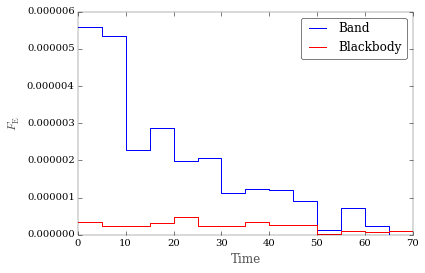

In [43]:
fig = figure(123)
ax = fig.add_subplot(111)
Step(ax,flc2.tBins,bandFlux2,col="blue")
Step(ax,flc2.tBins,bbFlux2,col="red")
ylabel(r"$F_{\rm E}$")
xlabel("Time")
ylim(bottom=0)
legend(["Band","Blackbody"])

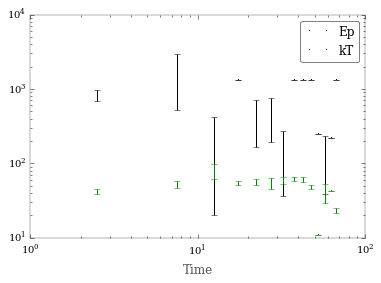

In [14]:
Ep = s2.GetParamArray("Band's GRB, Epeak","Epeak")[:,0]
EpErr = s2.GetParamArray("Band's GRB, Epeak","Epeak")[:,1]

kT = s2.GetParamArray("Black Body","kT")[:,0]
kTErr = s2.GetParamArray("Black Body","kT")[:,1]


# Get the mean of the time bins for plotting

time = s.meanTbins


errorbar(time,Ep,yerr=EpErr,fmt=',',color='k')
errorbar(time,kT,yerr=kTErr,fmt=',',color='g')
#ylabel(r"$E_{\rm p}$")
xlabel("Time")
xscale('log')
yscale('log', nonposy='clip')

legend(["Ep","kT"])
